# Overview

From: **[Kaggle SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data)**

**Context**

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, 

tagged acording being ham (legitimate) or spam.

**Content**

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

**Notes**

This project stems (ha!) from practicing text normalization and practicing with various normalization techniques (i.e., lemmatization, stemming, case folding, and embeddings).

**Binary Classification**

This is a binary classification problem that requires distinguishing spam from regular mail. Additionally, the data is annotated and will require training a 

supervised model using that data.

## Approach
- Read Data
- Explore the Data
- Processing the messages
- Classification

## Step 1: Install Libraries

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import nltk

In [6]:
# Import Stemmer & Lemmatizer 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re

## Step 2: Read Data

In [7]:
# Clean dataframe by dropping unnamed columns & renaming v1, v2: label, msg
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms = sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
sms.columns = ['label', 'msg']
sms.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Dataframe size
print("[columns, rows] =", sms.shape)

[columns, rows] = (5572, 2)


In [9]:
# Message contents
print(f"Ex. 1 \t {sms['msg'][0]}")
print(f"Ex. 2 \t {sms['msg'][1]}")
print(f"Ex. 3 \t {sms['msg'][2]}")

Ex. 1 	 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ex. 2 	 Ok lar... Joking wif u oni...
Ex. 3 	 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [10]:
# save FOR LATER COME BACK
# One-Hot-Encoding for ham/spam
# sms = sms.replace(['ham', 'spam'],[0,1])

## 2) Explore the Data

In [11]:
#sms.describe()
print(f"no. of rows: {len(sms)}")

no. of rows: 5572


In [12]:
# Total spam(1) and ham(0) messages
sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
# Count the number of characters in each message
sms['Count'] = sms['msg'].apply(len)
sms.head()

,label,msg,Count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### **2.1 Exploratory Data Analysis**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

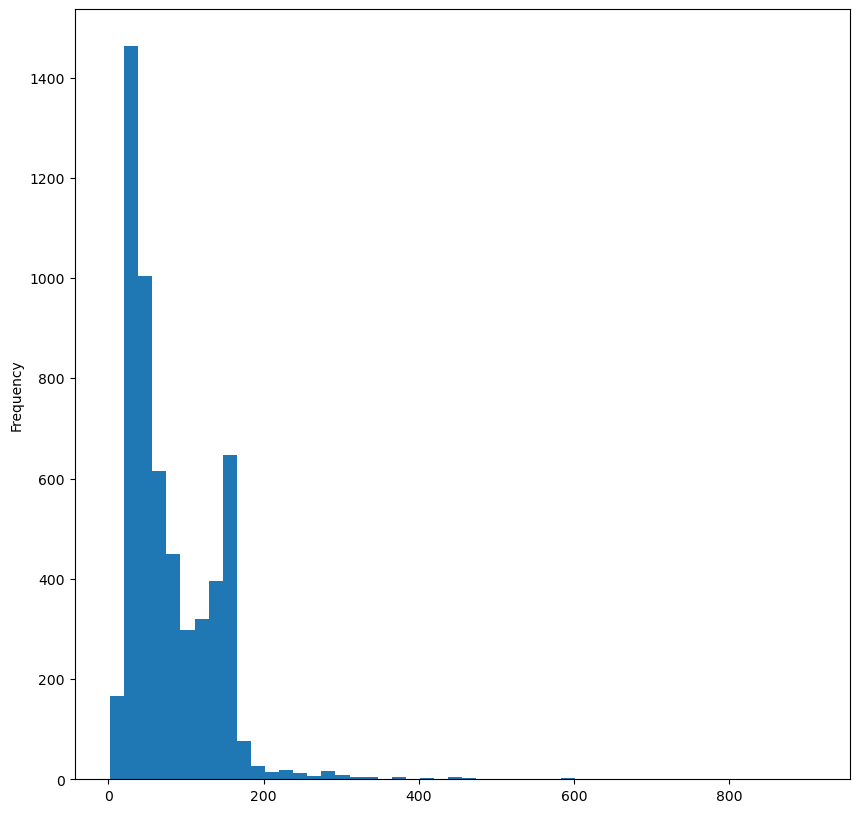

In [15]:
sms['Count'].plot(bins=50, kind='hist',figsize=(10,10))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

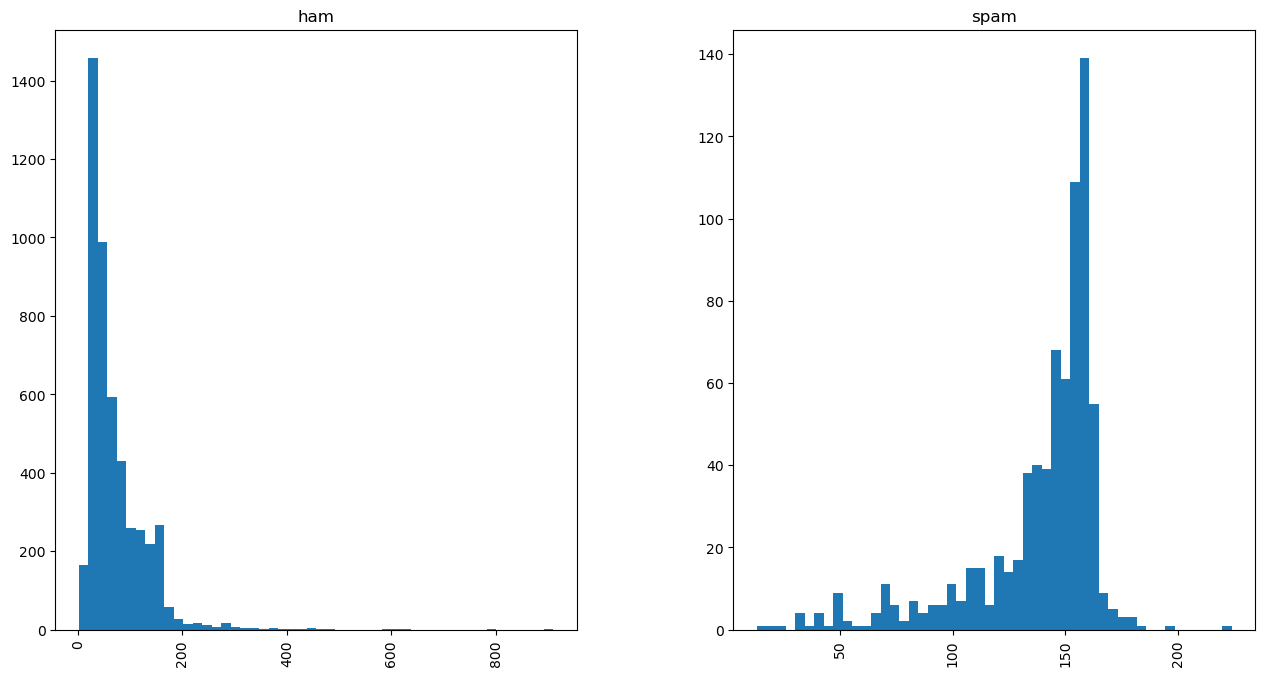

In [16]:
sms.hist(column='Count', by='label', bins=50, figsize=(15,8))

# 3) Processing Messages
- PorterStemmer, Regular Expressions
- Bag of Words

In [17]:
corpus = []
ps = PorterStemmer()
wnl = WordNetLemmatizer()

In [18]:
sms['msg'][1]

'Ok lar... Joking wif u oni...'

In [19]:
test = "joking"
print(f"PorterStemmer: {ps.stem(test)}")
print(f"WordNetLemmatizer: {wnl.lemmatize(test)}")

PorterStemmer: joke
WordNetLemmatizer: joking


In [20]:
# Implement Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
# First method using ONLY bag of words
count=CountVectorizer()
msg = count.fit_transform(sms['msg']).toarray()

In [22]:
# Second method using regular expressions/ Porter Stemmer OR Word Net Lemmatizer
for i in range(0, 5572):
    
    # Applying common REs to handle specific cases
    """
    Replace email address with 'email'
    Replace URLS with 'http'
    Replace currency symbols with 'moneysymb'
    Replace phone numbers with 'phonenumb'
    Replace numbers with 'numb'
    """
    cleaned_msg = sms['msg'][i]
    cleaned_msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'email', sms['msg'][i])
    cleaned_msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'https', sms['msg'][i])
    cleaned_msg = re.sub('£|\$', 'moneysymb', sms['msg'][i])
    cleaned_msg = re.sub('\b(?:\+?(\d{1,3})\s?)?[\-(.]?\d{3}[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumb', sms['msg'][i])
    cleaned_msg = re.sub('\d+(\.\d+)?','numb', sms['msg'][i])
    
    # Remove punctuation for normalization
    cleaned_msg = re.sub('[^\w\d\s]', ' ', sms['msg'][i])
    
    # Begin printing example 1
    if i<2:
        print("\t\t\t\t Message ", i)
    
    if i<2:
        print(f"\n After Regular Expression {i} : {cleaned_msg}")
    
    # Case folding 
    cleaned_msg = cleaned_msg.lower()
    if i<2:
        print(f"\n After case folding {i} : {cleaned_msg}")
    
    # Splitting words to tokenize
    tokenized_msg = cleaned_msg.split()
    if i<2:
        print(f"\n After splitting {i} : {tokenized_msg}")
        
    # PorterStemmer: ps.stem(word) avoiding Stopwords; 
    stemmed_msg = [ps.stem(word) for word in tokenized_msg if word not in set(stopwords.words('english'))]
    if i<2:
        print(f"\n After stemming {i} : {stemmed_msg}")

    # WordNetLemmatizer: wnl.lemmatize(word) avoiding Stopwords
    # lemmatized_msg = [wnl.lemmatize(word) for word in tokenized_msg if word not in set(stopwords.words('english'))]
    # if i<2:
    #     print(f"\n After lemmatizing {i} : {lemmatized_msg}")

    # Preparing Messages with Remaining Tokens
    final_msg = ' '.join(stemmed_msg)
    # final_msg = ' '.join(lemmatized_msg)
    if i<2:
        print(f"\n Final Prepared - Message {i} : {final_msg}, \n\n")
        
    # Prepare WordVector Corpus
    
    corpus.append(final_msg)    

				 Message  0

 After Regular Expression 0 : Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

 After case folding 0 : go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   

 After splitting 0 : ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']

 After stemming 0 : ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']

 Final Prepared - Message 0 : go jurong point crazi avail bugi n great world la e buffet cine got amor wat, 


				 Message  1

 After Regular Expression 1 : Ok lar    Joking wif u oni   

 After case folding 1 : ok lar    joking wif u oni   

 After splitting 1 : ['ok', 'lar', 'joking', 'wif', 'u', 'oni']

 After stemming 1 : ['ok', 'lar', 'joke', 'wif', 'u', 'oni']


In [23]:
msg.shape

(5572, 8672)

In [24]:
# already implemented: see above  
count = CountVectorizer()
msg = count.fit_transform(corpus).toarray() 

# 4) Apply Classification
- Naïve Bayes
- Gaussian Naïve Bayes
- Decision Trees

**Input**: Prepared a Sparse Matrix

**Ouput**: Labels (Ham or Spam)

In [25]:
y = sms['label']
# done earlier in the process; same results but beginning to encode labels
print(y.value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


**Encoding Labels**

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**Split the train-test data**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
msg.shape

(5572, 7213)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(msg, y, test_size=0.2, random_state=1)

In [30]:
print(X_train.shape)
print(X_test.shape)

(4457, 7213)
(1115, 7213)


In [31]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Classifier time!**

### 4.1 Naïve Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [33]:
prediction=nb_classifier.predict(X_test)

In [34]:
print(prediction)

[0 0 0 ... 0 0 0]


In [35]:
# Evaluating
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)

In [36]:
cm

array([[966,  10],
       [  6, 133]])

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy Score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision Score: {}". format(precision_score(y_test, prediction)) )
print("Recall Score: {}". format(recall_score(y_test, prediction)) )
print("F1 Score: {}". format(f1_score(y_test, prediction)) )

Accuracy Score: 0.9856502242152466
Precision Score: 0.9300699300699301
Recall Score: 0.9568345323741008
F1 Score: 0.9432624113475178


In [38]:
from sklearn.metrics import classification_report
print("Accuarcy : %0.5f \n\n"% accuracy_score(y_test, nb_classifier.predict(X_test)))
print(classification_report(y_test, nb_classifier.predict(X_test)))

Accuarcy : 0.98565 


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.93      0.96      0.94       139

    accuracy                           0.99      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### 4.2 Gaussian NB

In [39]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [40]:
prediction=model2.predict(X_test)

In [41]:
# Evaluating
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)

In [42]:
cm

array([[848, 128],
       [  9, 130]])

In [43]:
print("Accuarcy : %0.5f \n\n"% accuracy_score(y_test, model2.predict(X_test)))
print(classification_report(y_test, model2.predict(X_test)))

Accuarcy : 0.87713 


              precision    recall  f1-score   support

           0       0.99      0.87      0.93       976
           1       0.50      0.94      0.65       139

    accuracy                           0.88      1115
   macro avg       0.75      0.90      0.79      1115
weighted avg       0.93      0.88      0.89      1115



In [44]:
print("Accuracy Score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision Score: {}". format(precision_score(y_test, prediction)) )
print("Recall Score: {}". format(recall_score(y_test, prediction)) )
print("F1 Score: {}". format(f1_score(y_test, prediction)) )

Accuracy Score: 0.8771300448430494
Precision Score: 0.5038759689922481
Recall Score: 0.935251798561151
F1 Score: 0.654911838790932


### 4.3 Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [46]:
# Predicting
prediction = dt.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, prediction)

In [48]:
cm

array([[964,  12],
       [  9, 130]])

In [49]:
print("Accuarcy : %0.5f \n\n"% accuracy_score(y_test, dt.predict(X_test)))
print(classification_report(y_test, dt.predict(X_test)))

Accuarcy : 0.98117 


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.92      0.94      0.93       139

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [50]:
print("Accuracy Score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision Score: {}". format(precision_score(y_test, prediction)) )
print("Recall Score: {}". format(recall_score(y_test, prediction)) )
print("F1 Score: {}". format(f1_score(y_test, prediction)) )

Accuracy Score: 0.9811659192825112
Precision Score: 0.9154929577464789
Recall Score: 0.935251798561151
F1 Score: 0.9252669039145907


# 5) Final Accuracy
(Using Method 2; method 1 is trivially worse)
- **Decision Tree  : 98.117%**
- **Guassian NB    : 87.133%**  
- **Multinomial NB : 98.565%**

### Notes:
Multinomial NB works better for features that represent counts or frequencies, often used in text classification. Bernoulli NB is suitable for binary/boolean features. If both models are performing similarly, it's worth exploring further by analyzing the misclassifications.

### Consider using lemmatization instead of stemming! **DONE!**

**December 20th, 2023:** _Note on stemming/lemmatization_

Lemmatization is trivially worse than stemming. This may be surprising since stems are crudely stemmed and lemma contain lexical meaning from wordnet. 

Example is shown in the preprocessing step:
- PS: joking -> joke; 
- WNL: joking -> joking 

This simple distinction is not captured in the lemmatizer and regarding our problem set of differentiating between spam and non-spam, following crudely chopping may be best. However, lemmatization is only **trivially** worse. 

# pickle

play with below

In [51]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(nb_classifier, filename)

['finalized_model.sav']

In [52]:
loaded_model = joblib.load(filename)

In [53]:
result = loaded_model.score(X_test, y_test)

In [54]:
print(result)

0.9856502242152466


In [109]:
filename2 = 'vectorizer.sav'
joblib.dump(count, filename2)

['vectorizer.sav']

In [112]:
vectorizer = joblib.load(filename2)

In [117]:
input = ['Hi Matt A free service for you ONLY!! Please click on the link now!']

result2 = vectorizer.transform(input)

In [118]:
result2

<1x7213 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

## Step ? — Inference
One of the purposes of text categorization is to produce a function that automatically assigns a class (spam or ham) to a new message based on the model.

For example, the message "A new free service for you only" could be classify using the model (the last one).

Transform the message into a vector of presence absence of the terms present in the dictionary. This is completed by creating a sparse matrix to pull

out the relevant features.

In [143]:
# Testing grounds to prepare processing function for app.py 

def process(text):
    clean = []
    cleaned_msg = text
    cleaned_msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'email', cleaned_msg)
    cleaned_msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'https', cleaned_msg)
    cleaned_msg = re.sub('£|\$', 'moneysymb', cleaned_msg)
    cleaned_msg = re.sub('\b(?:\+?(\d{1,3})\s?)?[\-(.]?\d{3}[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumb', cleaned_msg)
    cleaned_msg = re.sub('\d+(\.\d+)?','numb', cleaned_msg)
        
        # Remove punctuation for normalization
    cleaned_msg = re.sub('[^\w\d\s]', ' ', cleaned_msg)
                
        # Case folding 
    cleaned_msg = cleaned_msg.lower()
        
        # Splitting words to tokenize
    tokenized_msg = cleaned_msg.split()
            
        # PorterStemmer: ps.stem(word) avoiding Stopwords; 
    stemmed_msg = [ps.stem(word) for word in tokenized_msg if word not in set(stopwords.words('english'))]

        # Preparing Messages with Remaining Tokens
    final_msg = ' '.join(stemmed_msg)
   
        # Prepare WordVector Corpus
        
    clean.append(final_msg)  
    clean_input = count.transform(clean)

    # return the processed message
    return clean_input

In [193]:
# may also use the probability for the model? 
probability = round(loaded_model.predict_proba(clean_input)[0][1], 2)
print(probability)

0.99


In [185]:
# Evaluation Function
input = "Hi Matt A free service for you ONLY!! Please click on the link now!"
clean_input = process(input)

# Feature extraction
print("The terms detected in the sentence are:", np.asarray(count.get_feature_names_out())[clean_input.indices])
print('\n')

check = loaded_model.predict(clean_input)[0]
if check == 0:
    print("This is a Ham email!")
else:
    print("This is a Spam email!")


The terms detected in the sentence are: ['click' 'free' 'hi' 'link' 'pleas' 'servic']


This is a Spam email!


In [192]:
# Message 2
input = "A new free service for you ONLY!"
clean_input = process(input)

# Feature extraction
print("The terms detected in the sentence are:", np.asarray(count.get_feature_names_out())[clean_input.indices])
print('\n')

check = loaded_model.predict(clean_input)[0]
if check == 0:
    print("This is a Ham email!")
else:
    print("This is a Spam email!")

The terms detected in the sentence are: ['free' 'new' 'servic']


This is a Spam email!


In [160]:
# Message 3
input = "Hi Jerry, just a reminder about our appointment tomorrow at 8:00pm for your dental check-up. \
         Please remember to bring your insurance card. See you then! Click this link."
clean_input = process(input)

# Feature extraction
print("The terms detected in the sentence are:", np.asarray(count.get_feature_names_out())[clean_input.indices])
print('\n')

check = loaded_model.predict(clean_input)[0]
if check == 0:
    print("This is a Ham email!")
else:
    print("This is a Spam email!")

The terms detected in the sentence are: ['appoint' 'bring' 'card' 'check' 'click' 'dental' 'hi' 'insur' 'jerri'
 'link' 'pleas' 'rememb' 'remind' 'see' 'tomorrow']


This is a Ham email!


In [156]:
# Message 4
input = "URGENT: Your account has been compromised! \
    Click the link to secure your account now or risk losing access permanently. Don't ignore, act fast!"
clean_input = process(input)

# Feature extraction
print("The terms detected in the sentence are:", np.asarray(count.get_feature_names_out())[clean_input.indices])
print('\n')

check = loaded_model.predict(clean_input)[0]
if check == 0:
    print("This is a Ham email!")
else:
    print("This is a Spam email!")

The terms detected in the sentence are: ['access' 'account' 'act' 'click' 'compromis' 'fast' 'ignor' 'link' 'lose'
 'perman' 'risk' 'secur' 'urgent']


This is a Spam email!
